### Explore the relationship between air quality and asthma at the U.S. State level

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline

### Read in previously cleaned datafiles for 2012 air quality and 2012 asthma

In [2]:
AQI1Cleaned = pd.read_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\annual_aqi_by_county_2012_cleaned.csv')

In [3]:
AQI1Cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Unnamed: 0                           1053 non-null   int64 
 1   State                                1053 non-null   object
 2   County                               1053 non-null   object
 3   Year                                 1053 non-null   int64 
 4   Days with AQI                        1053 non-null   int64 
 5   Good Days                            1053 non-null   int64 
 6   Moderate Days                        1053 non-null   int64 
 7   Unhealthy for Sensitive Groups Days  1053 non-null   int64 
 8   Unhealthy Days                       1053 non-null   int64 
 9   Very Unhealthy Days                  1053 non-null   int64 
 10  Hazardous Days                       1053 non-null   int64 
 11  Max AQI                              1053 n

In [4]:
AQI1Cleaned.head()

,Unnamed: 0,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,0,Alabama,Baldwin,2012,284,226,56,2,0,0,0,112,61,38,0,0,210,0,74,0
1,1,Alabama,Clay,2012,121,99,22,0,0,0,0,72,56,35,0,0,0,0,121,0
2,2,Alabama,Colbert,2012,283,222,55,6,0,0,0,136,62,40,0,0,209,0,74,0
3,3,Alabama,DeKalb,2012,361,282,74,5,0,0,0,115,64,40,0,0,320,0,41,0
4,4,Alabama,Elmore,2012,245,212,33,0,0,0,0,100,54,40,0,0,245,0,0,0


In [5]:
asthma2012Cleaned = pd.read_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\asthma2012_cleaned.csv')

In [6]:
asthma2012Cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               50 non-null     int64  
 1   YearStart                50 non-null     int64  
 2   YearEnd                  50 non-null     int64  
 3   LocationAbbr             50 non-null     object 
 4   LocationDesc             50 non-null     object 
 5   DataSource               50 non-null     object 
 6   Topic                    50 non-null     object 
 7   Question                 50 non-null     object 
 8   Response                 0 non-null      float64
 9   DataValueUnit            50 non-null     object 
 10  DataValueType            50 non-null     object 
 11  DataValue                50 non-null     float64
 12  DataValueAlt             50 non-null     float64
 13  DataValueFootnoteSymbol  0 non-null      float64
 14  DatavalueFootnote        0 n

In [7]:
asthma2012Cleaned.head()

,Unnamed: 0,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
0,23161,2012,2012,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,9.0,9.0,NaN,NaN,7.9,10.3,Overall,Overall
1,23038,2012,2012,AL,Alabama,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,8.6,8.6,NaN,NaN,7.8,9.5,Overall,Overall
2,22988,2012,2012,AR,Arkansas,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,8.8,8.8,NaN,NaN,7.8,9.8,Overall,Overall
3,23560,2012,2012,AZ,Arizona,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,8.6,8.6,NaN,NaN,7.7,9.7,Overall,Overall
4,23261,2012,2012,CA,California,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,8.8,8.8,NaN,NaN,8.2,9.5,Overall,Overall


### Join datasets

The asthma2012 dataset does not have county level information. To join the datasets, group the AQI2012 dataset by State.

In [8]:
#calculate State means of all numeric columns
AQI1States = AQI1Cleaned.iloc[:, 4:].groupby(AQI1Cleaned['State']).mean()

In [9]:
AQI1States.head()

,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
State,,,,,,,,,,,,,,,,
Alabama,263.588235,201.000000,58.823529,3.529412,0.235294,0.000000,0.000000,110.235294,62.352941,40.176471,0.000000,0.000000,174.529412,0.411765,85.117647,3.529412
Alaska,301.250000,258.625000,36.625000,2.625000,3.125000,0.250000,0.000000,96.250000,50.875000,22.125000,1.375000,0.000000,95.250000,0.875000,152.750000,51.000000
Arizona,336.538462,185.846154,120.076923,26.923077,3.076923,0.307692,0.307692,173.538462,82.846154,49.538462,0.000000,3.000000,179.307692,19.307692,22.307692,112.615385
Arkansas,225.071429,164.571429,56.500000,3.642857,0.357143,0.000000,0.000000,111.357143,63.714286,38.071429,0.000000,2.642857,123.285714,18.142857,81.000000,0.000000
California,349.611111,202.314815,113.833333,25.851852,6.833333,0.370370,0.407407,288.703704,87.907407,48.703704,0.037037,6.759259,219.462963,0.092593,110.722222,12.537037


In [10]:
#round the calculated mean columns and convert to integers
AQI1States = AQI1States.iloc[:, :].round().astype(int)

In [11]:
AQI1States.head()

,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
State,,,,,,,,,,,,,,,,
Alabama,264,201,59,4,0,0,0,110,62,40,0,0,175,0,85,4
Alaska,301,259,37,3,3,0,0,96,51,22,1,0,95,1,153,51
Arizona,337,186,120,27,3,0,0,174,83,50,0,3,179,19,22,113
Arkansas,225,165,56,4,0,0,0,111,64,38,0,3,123,18,81,0
California,350,202,114,26,7,0,0,289,88,49,0,7,219,0,111,13


In [12]:
AQI1States = AQI1States.reset_index()

In [13]:
#limit the columns in the asthma2012 dataset to most relevant
asthma2012Compact = asthma2012Cleaned[['LocationDesc', 'Question', 'DataValueType', 'DataValue']]
asthma2012Compact.head()

,LocationDesc,Question,DataValueType,DataValue
0,Alaska,Current asthma prevalence among adults aged >=...,Crude Prevalence,9.0
1,Alabama,Current asthma prevalence among adults aged >=...,Crude Prevalence,8.6
2,Arkansas,Current asthma prevalence among adults aged >=...,Crude Prevalence,8.8
3,Arizona,Current asthma prevalence among adults aged >=...,Crude Prevalence,8.6
4,California,Current asthma prevalence among adults aged >=...,Crude Prevalence,8.8


In [14]:
#merge the datasets
merged2012 = pd.merge(AQI1States, asthma2012Compact, left_on=AQI1States['State'], 
             right_on=asthma2012Compact['LocationDesc'],
             how = 'left')
merged2012.head()

,key_0,State,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,...,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,LocationDesc,Question,DataValueType,DataValue
0,Alabama,Alabama,264,201,59,4,0,0,0,110,...,0,0,175,0,85,4,Alabama,Current asthma prevalence among adults aged >=...,Crude Prevalence,8.6
1,Alaska,Alaska,301,259,37,3,3,0,0,96,...,1,0,95,1,153,51,Alaska,Current asthma prevalence among adults aged >=...,Crude Prevalence,9.0
2,Arizona,Arizona,337,186,120,27,3,0,0,174,...,0,3,179,19,22,113,Arizona,Current asthma prevalence among adults aged >=...,Crude Prevalence,8.6
3,Arkansas,Arkansas,225,165,56,4,0,0,0,111,...,0,3,123,18,81,0,Arkansas,Current asthma prevalence among adults aged >=...,Crude Prevalence,8.8
4,California,California,350,202,114,26,7,0,0,289,...,0,7,219,0,111,13,California,Current asthma prevalence among adults aged >=...,Crude Prevalence,8.8


In [15]:
merged2012.columns

Index(['key_0', 'State', 'Days with AQI', 'Good Days', 'Moderate Days',
       'Unhealthy for Sensitive Groups Days', 'Unhealthy Days',
       'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days SO2', 'Days PM2.5', 'Days PM10', 'LocationDesc',
       'Question', 'DataValueType', 'DataValue'],
      dtype='object')

In [16]:
#reformat dataset for exploratory analylsis
merged2012 = merged2012.drop('key_0', axis=1)
merged2012 = merged2012.set_index('State')
merged2012 = merged2012.rename(columns={'Unhealthy for Sensitive Groups Days' : 'U for SG Days'})
merged2012.head()

,Days with AQI,Good Days,Moderate Days,U for SG Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,LocationDesc,Question,DataValueType,DataValue
State,,,,,,,,,,,,,,,,,,,,
Alabama,264,201,59,4,0,0,0,110,62,40,0,0,175,0,85,4,Alabama,Current asthma prevalence among adults aged >=...,Crude Prevalence,8.6
Alaska,301,259,37,3,3,0,0,96,51,22,1,0,95,1,153,51,Alaska,Current asthma prevalence among adults aged >=...,Crude Prevalence,9.0
Arizona,337,186,120,27,3,0,0,174,83,50,0,3,179,19,22,113,Arizona,Current asthma prevalence among adults aged >=...,Crude Prevalence,8.6
Arkansas,225,165,56,4,0,0,0,111,64,38,0,3,123,18,81,0,Arkansas,Current asthma prevalence among adults aged >=...,Crude Prevalence,8.8
California,350,202,114,26,7,0,0,289,88,49,0,7,219,0,111,13,California,Current asthma prevalence among adults aged >=...,Crude Prevalence,8.8


In [17]:
merged2012.columns

Index(['Days with AQI', 'Good Days', 'Moderate Days', 'U for SG Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days SO2', 'Days PM2.5', 'Days PM10', 'LocationDesc',
       'Question', 'DataValueType', 'DataValue'],
      dtype='object')

In [18]:
#specify initial columns of interest
cols = ['Days with AQI', 'Good Days', 'Moderate Days',
       'U for SG Days', 'Unhealthy Days',
       'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days SO2', 'Days PM2.5', 'Days PM10', 'DataValue']

In [19]:
merged2012Plotting = merged2012[cols]

In [20]:
merged2012Plotting.describe()

,Days with AQI,Good Days,Moderate Days,U for SG Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,DataValue
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,309.860000,228.000000,71.28000,8.180000,2.180000,0.040000,0.020000,138.040000,66.880000,38.300000,0.380000,5.240000,168.040000,13.280000,106.720000,16.060000,9.054000
std,36.717904,38.924836,23.39461,6.862171,7.739878,0.197949,0.141421,35.481504,10.925798,6.887581,1.368598,7.558101,60.646167,19.794908,61.435561,24.983595,1.120716
min,221.000000,164.000000,22.00000,1.000000,0.000000,0.000000,0.000000,94.000000,49.000000,22.000000,0.000000,0.000000,32.000000,0.000000,15.000000,0.000000,6.800000
25%,287.000000,201.000000,55.25000,3.000000,0.000000,0.000000,0.000000,113.750000,58.250000,35.000000,0.000000,1.000000,136.000000,1.000000,71.250000,0.000000,8.250000
50%,310.000000,223.000000,69.00000,5.500000,1.000000,0.000000,0.000000,128.500000,64.000000,39.000000,0.000000,3.000000,180.000000,5.500000,95.000000,4.500000,8.900000
75%,341.250000,251.750000,83.00000,12.000000,2.000000,0.000000,0.000000,153.250000,75.000000,42.000000,0.000000,6.750000,210.750000,17.250000,130.000000,19.750000,10.050000
max,366.000000,320.000000,120.00000,29.000000,55.000000,1.000000,1.000000,289.000000,90.000000,64.000000,9.000000,41.000000,262.000000,98.000000,310.000000,113.000000,11.100000


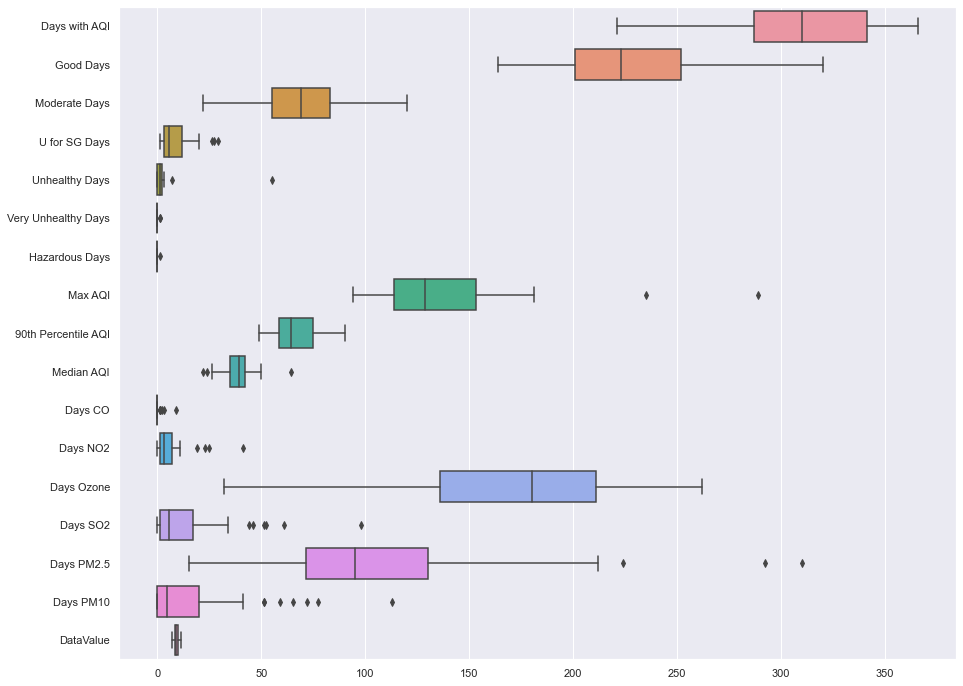

In [21]:
sns.set(rc = {'figure.figsize':(15,12)})
plot = sns.boxplot(data=merged2012Plotting, orient='h')

In [22]:
plt.close()

### Create a correlation matrix with heatmap

In [23]:
#correlation matrix with heatmap code from CIS5400, Python and Data Science
merged2012[cols].values 
merged2012[cols].values.T #transpose the matrix
cm = np.corrcoef(merged2012[cols].values.T)

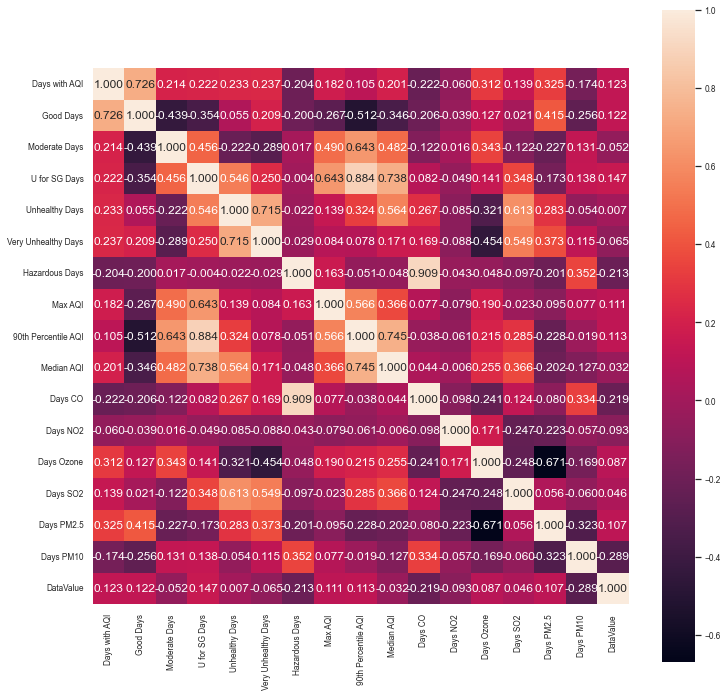

In [26]:
sns.set(font_scale=.75)
#cbar - boolean to specify whether or not to draw the color bar
#annot - boolean to specify whether or not to annotate the heatmap
#square - boolean to specify whether or not to set the Axes aspect 
#to “equal” so each cell will be square-shaped.
#fmt='.2f' - string formatting code to use when adding annotations
#annot_kws - dict of key, value mappings, optional keyword arguments for 
#matplotlib.axes.Axes.text() when annot is True
fig, ax = plt.subplots(figsize=(12,12))

hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.3f',
                annot_kws={'size':12},yticklabels=cols,xticklabels=cols,
                ax=ax)

### Create scatterplots

<AxesSubplot:xlabel='Days with AQI', ylabel='DataValue'>

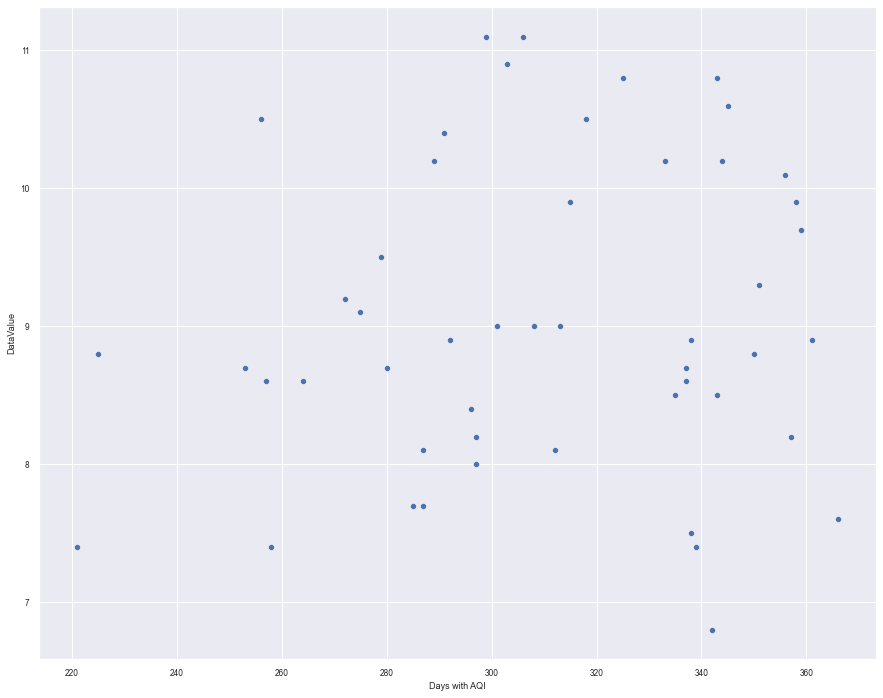

In [27]:
sns.scatterplot(x='Days with AQI', y='DataValue', data=merged2012Plotting)

<AxesSubplot:xlabel='Good Days', ylabel='DataValue'>

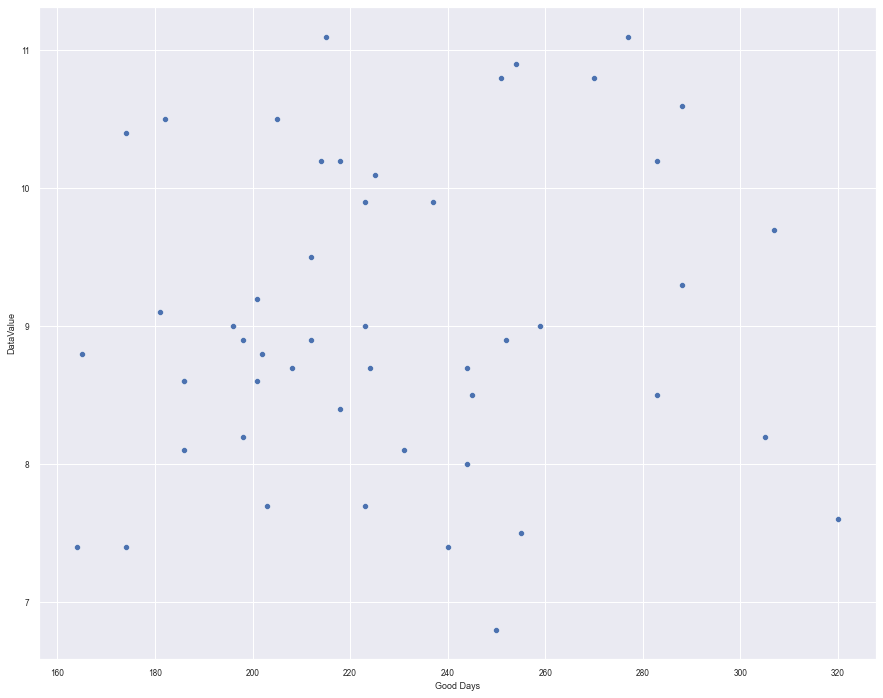

In [28]:
sns.scatterplot(x='Good Days', y='DataValue', data=merged2012Plotting)

<AxesSubplot:xlabel='Moderate Days', ylabel='DataValue'>

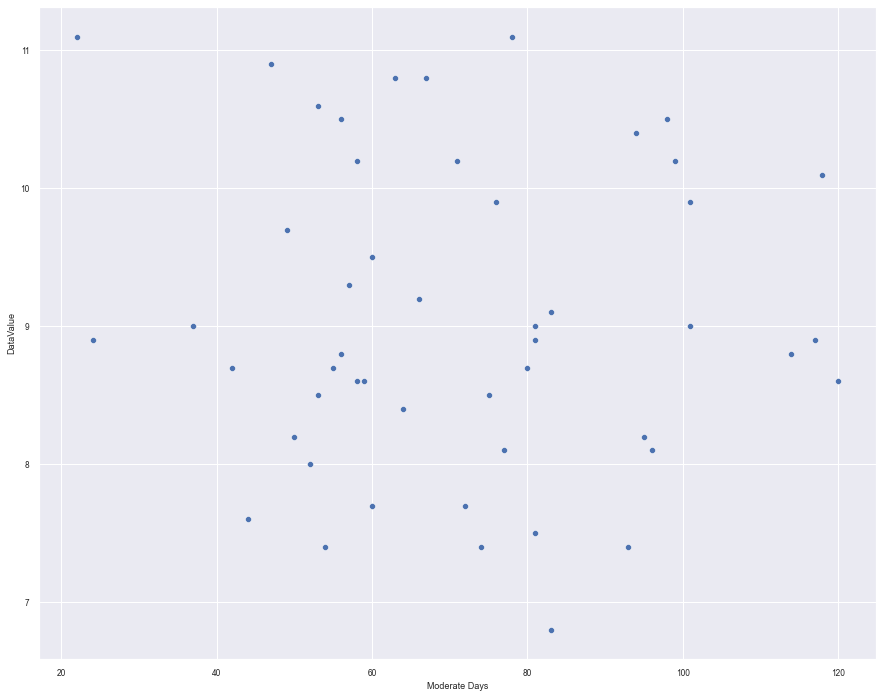

In [29]:
sns.scatterplot(x='Moderate Days', y='DataValue', data=merged2012Plotting)

<AxesSubplot:xlabel='U for SG Days', ylabel='DataValue'>

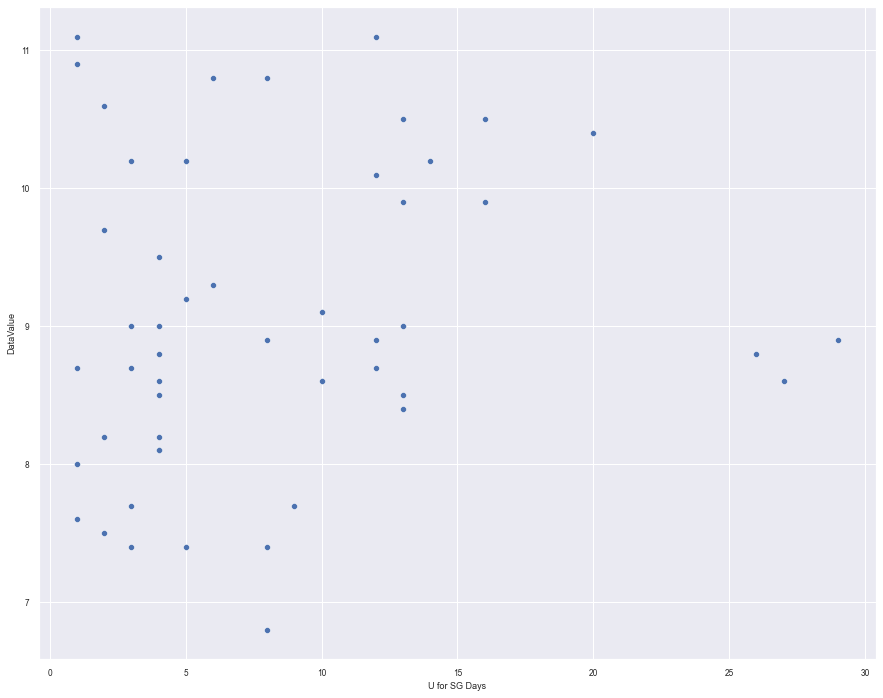

In [30]:
sns.scatterplot(x='U for SG Days', y='DataValue', data=merged2012Plotting)

<AxesSubplot:xlabel='Unhealthy Days', ylabel='DataValue'>

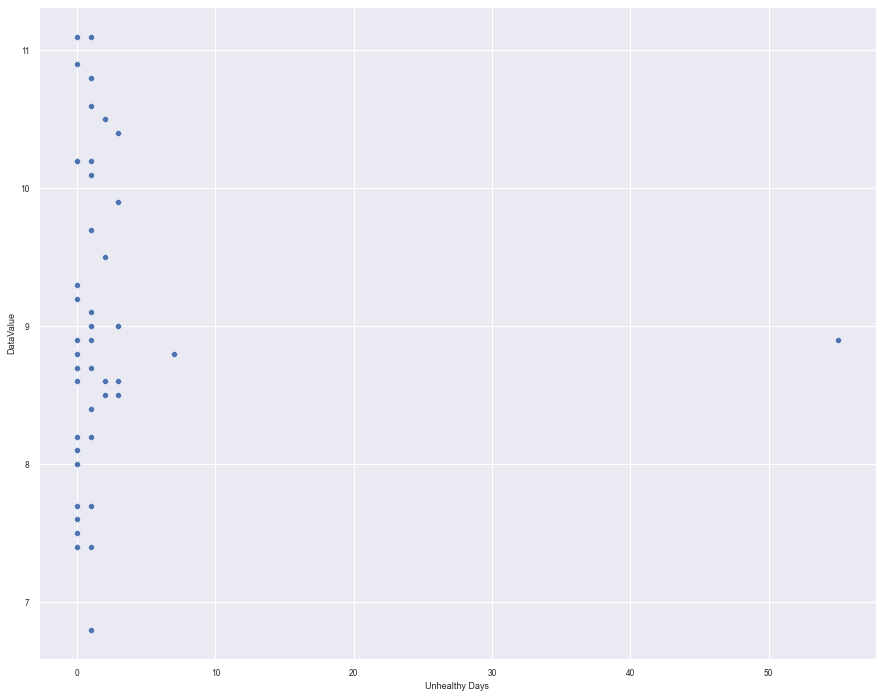

In [31]:
sns.scatterplot(x='Unhealthy Days', y='DataValue', data=merged2012Plotting)

<AxesSubplot:xlabel='Very Unhealthy Days', ylabel='DataValue'>

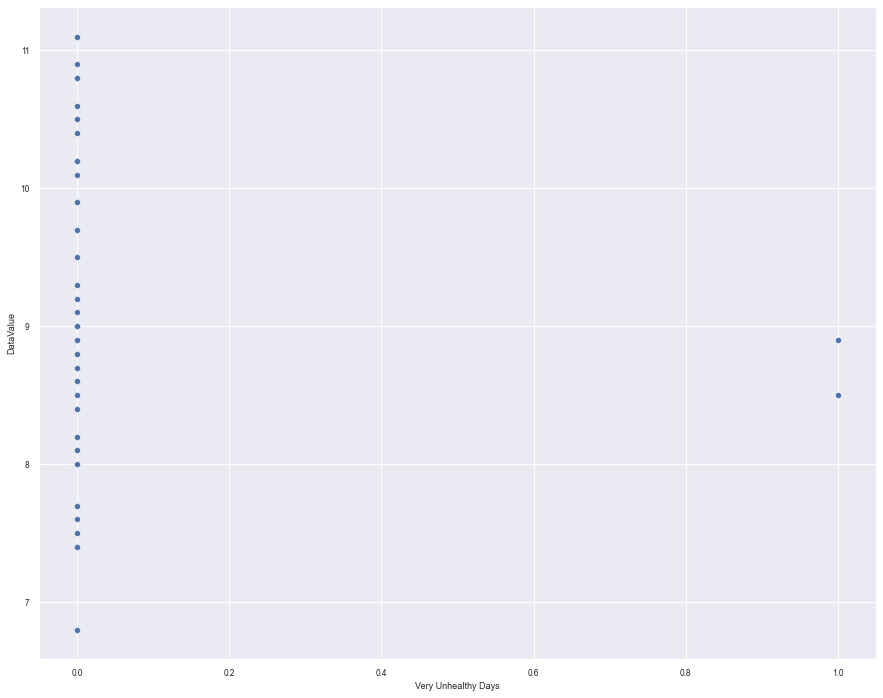

In [32]:
sns.scatterplot(x='Very Unhealthy Days', y='DataValue', data=merged2012Plotting)

<AxesSubplot:xlabel='Hazardous Days', ylabel='DataValue'>

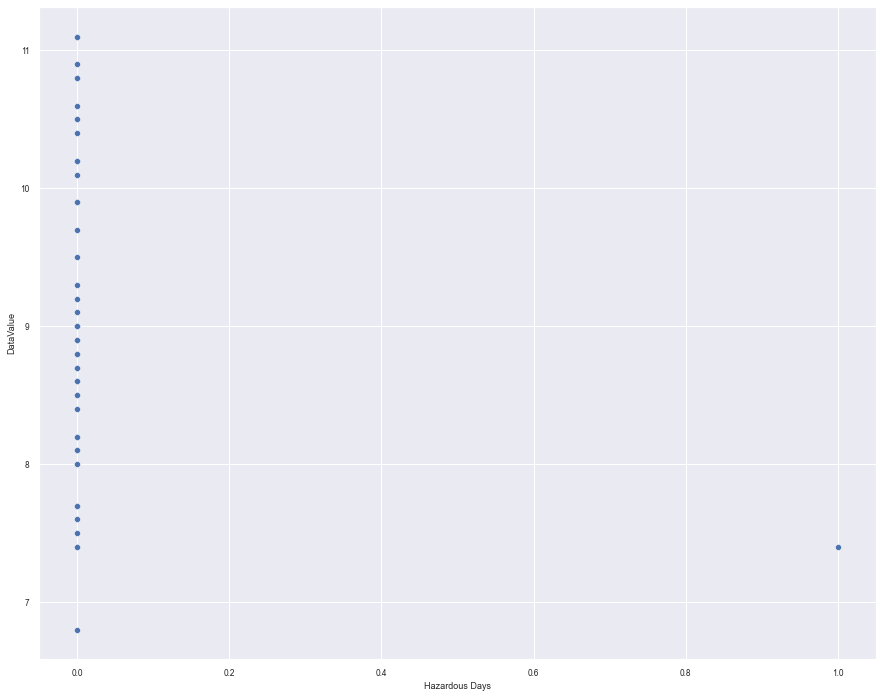

In [33]:
sns.scatterplot(x='Hazardous Days', y='DataValue', data=merged2012Plotting)

<AxesSubplot:xlabel='Max AQI', ylabel='DataValue'>

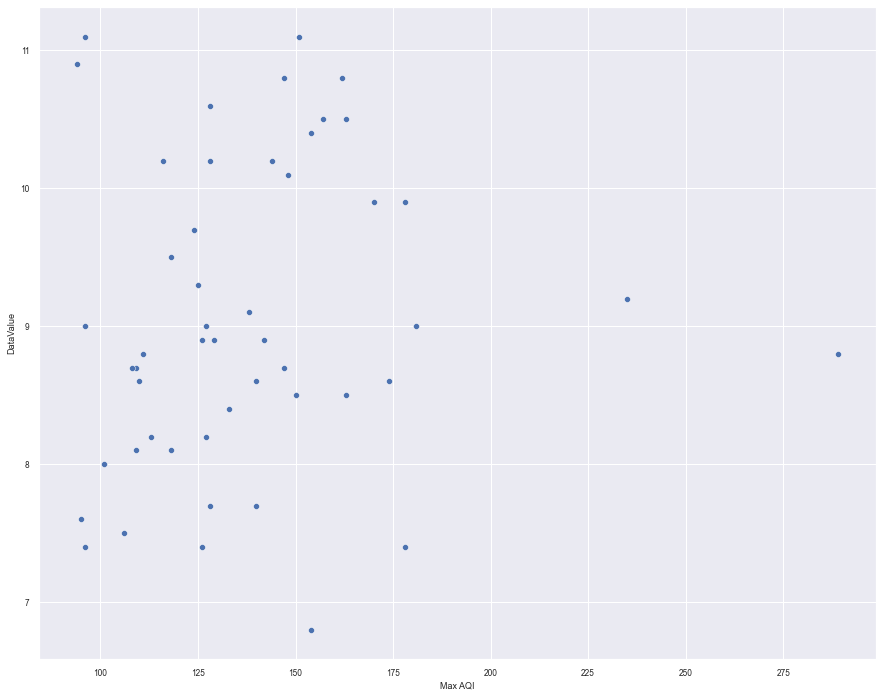

In [34]:
sns.scatterplot(x='Max AQI', y='DataValue', data=merged2012Plotting)

<AxesSubplot:xlabel='90th Percentile AQI', ylabel='DataValue'>

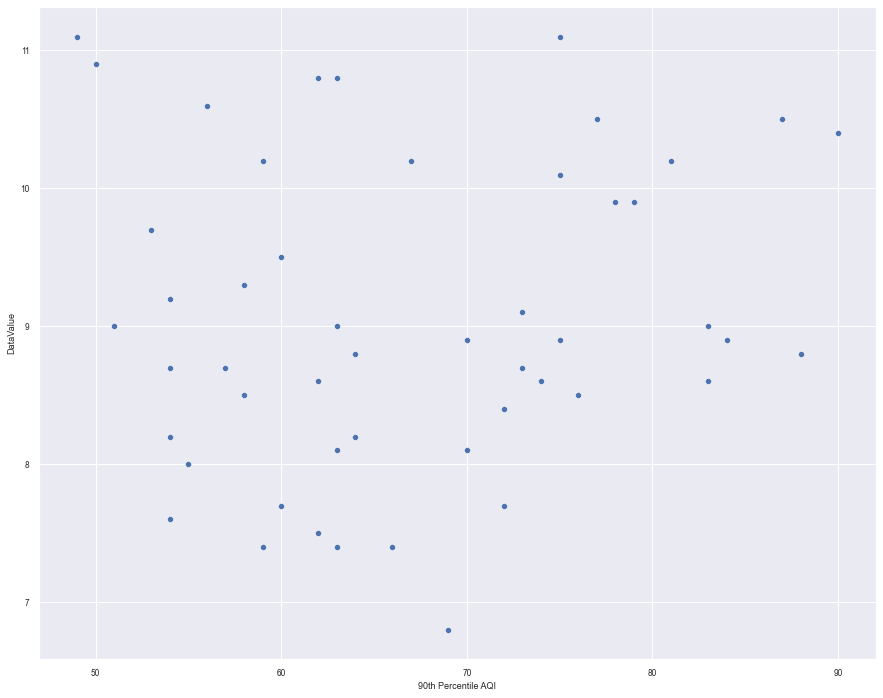

In [35]:
sns.scatterplot(x='90th Percentile AQI', y='DataValue', data=merged2012Plotting)

<AxesSubplot:xlabel='Median AQI', ylabel='DataValue'>

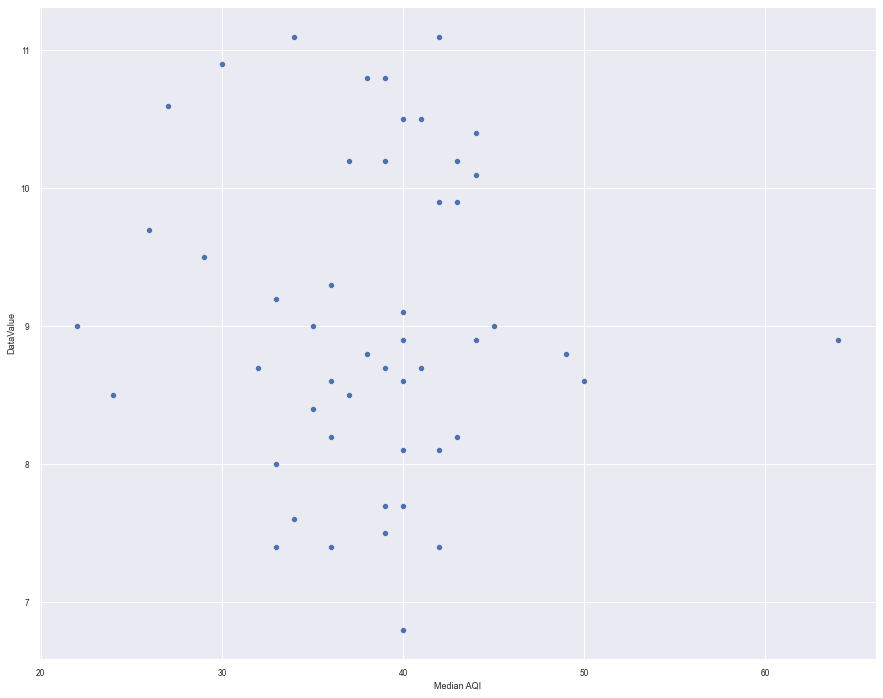

In [36]:
sns.scatterplot(x='Median AQI', y='DataValue', data=merged2012Plotting)

<AxesSubplot:xlabel='Days CO', ylabel='DataValue'>

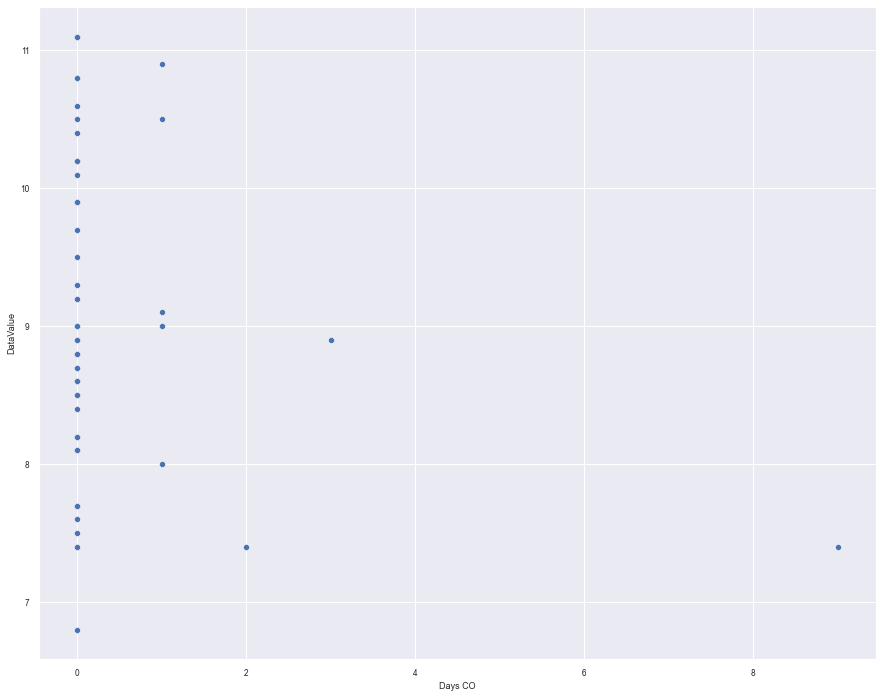

In [37]:
sns.scatterplot(x='Days CO', y='DataValue', data=merged2012Plotting)

<AxesSubplot:xlabel='Days NO2', ylabel='DataValue'>

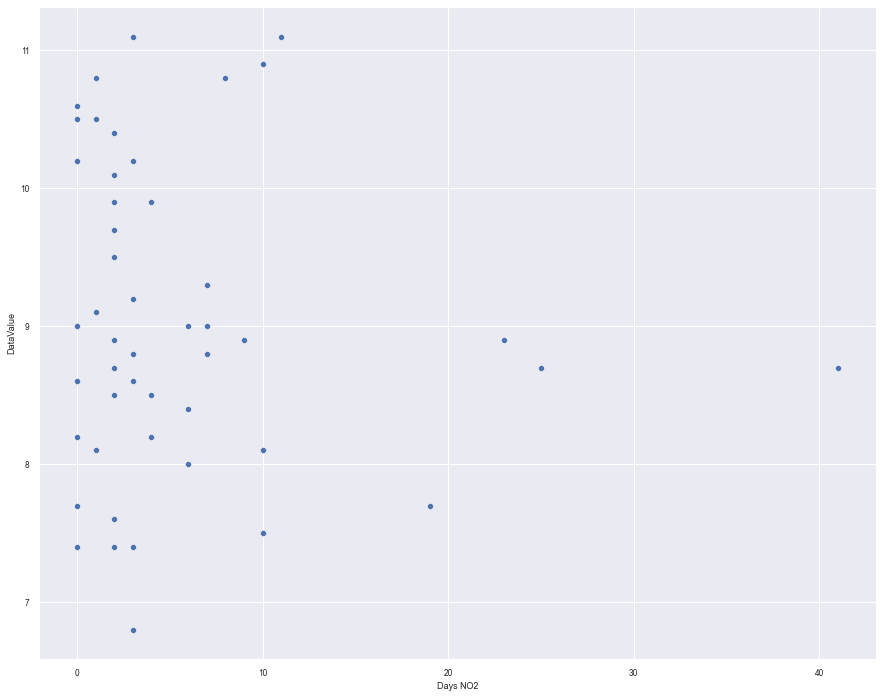

In [38]:
sns.scatterplot(x='Days NO2', y='DataValue', data=merged2012Plotting)

<AxesSubplot:xlabel='Days Ozone', ylabel='DataValue'>

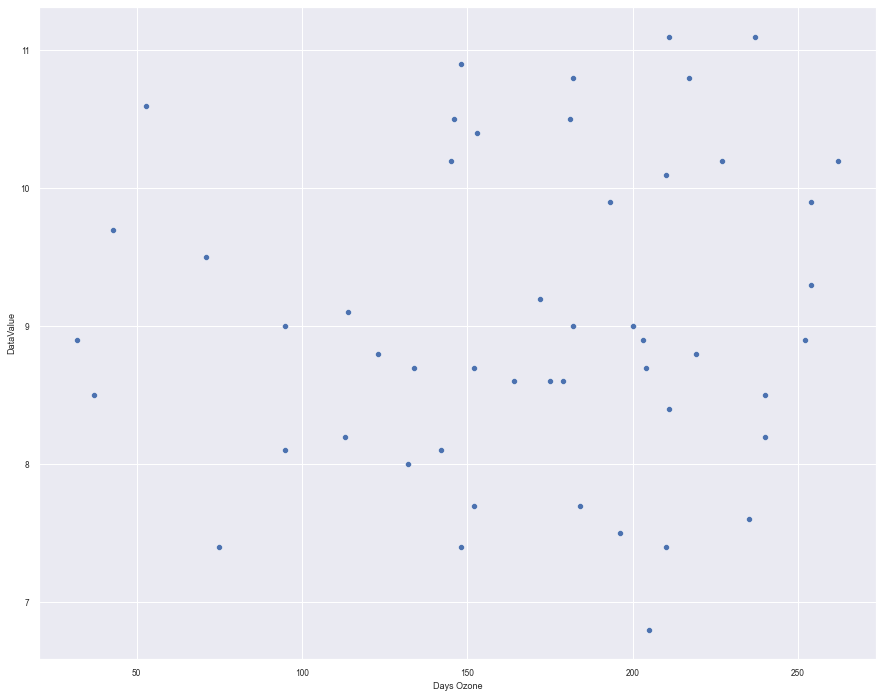

In [39]:
sns.scatterplot(x='Days Ozone', y='DataValue', data=merged2012Plotting)

<AxesSubplot:xlabel='Days SO2', ylabel='DataValue'>

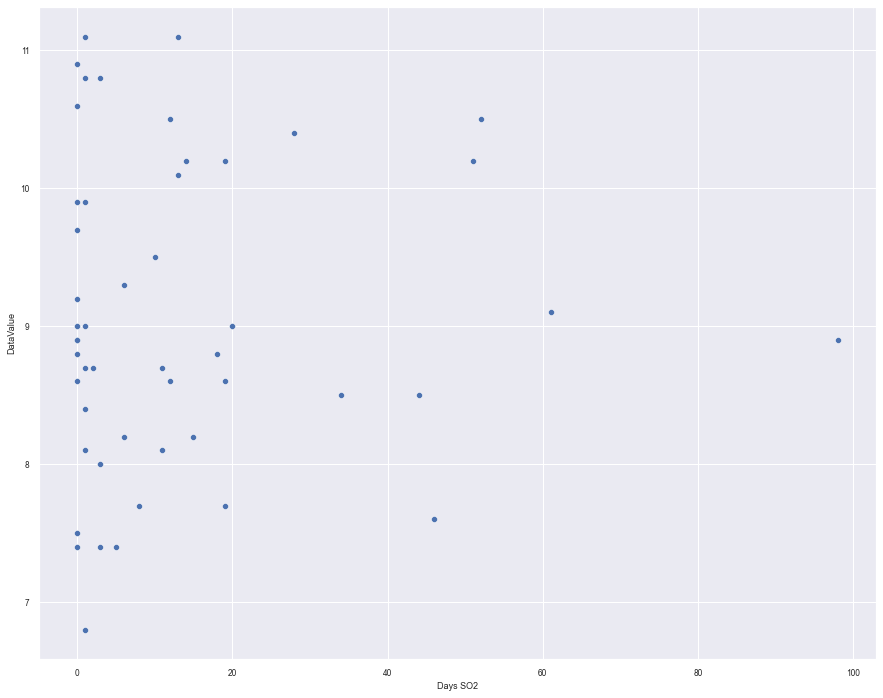

In [40]:
sns.scatterplot(x='Days SO2', y='DataValue', data=merged2012Plotting)

<AxesSubplot:xlabel='Days PM2.5', ylabel='DataValue'>

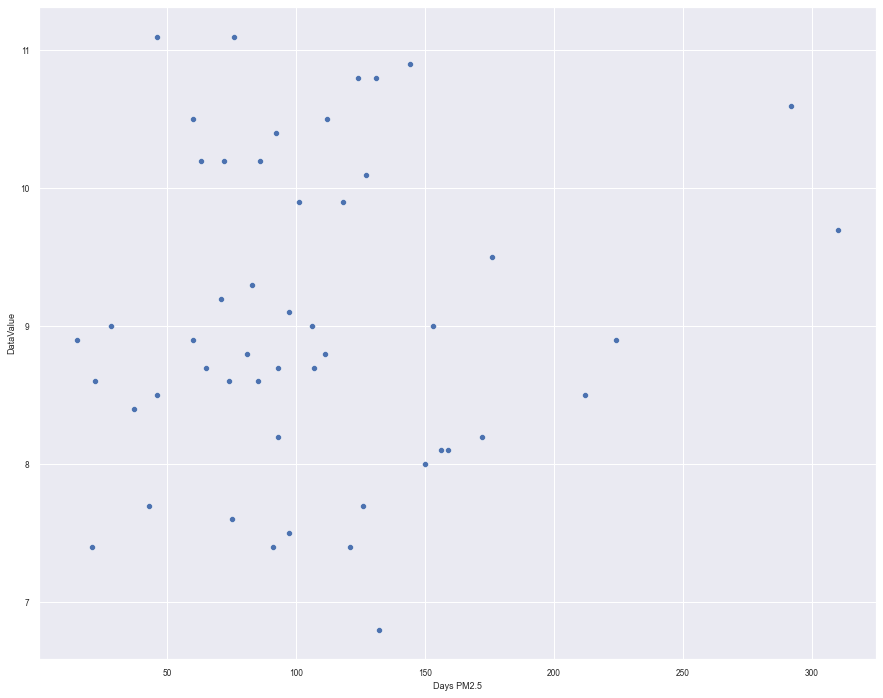

In [41]:
sns.scatterplot(x='Days PM2.5', y='DataValue', data=merged2012Plotting)

<AxesSubplot:xlabel='Days PM10', ylabel='DataValue'>

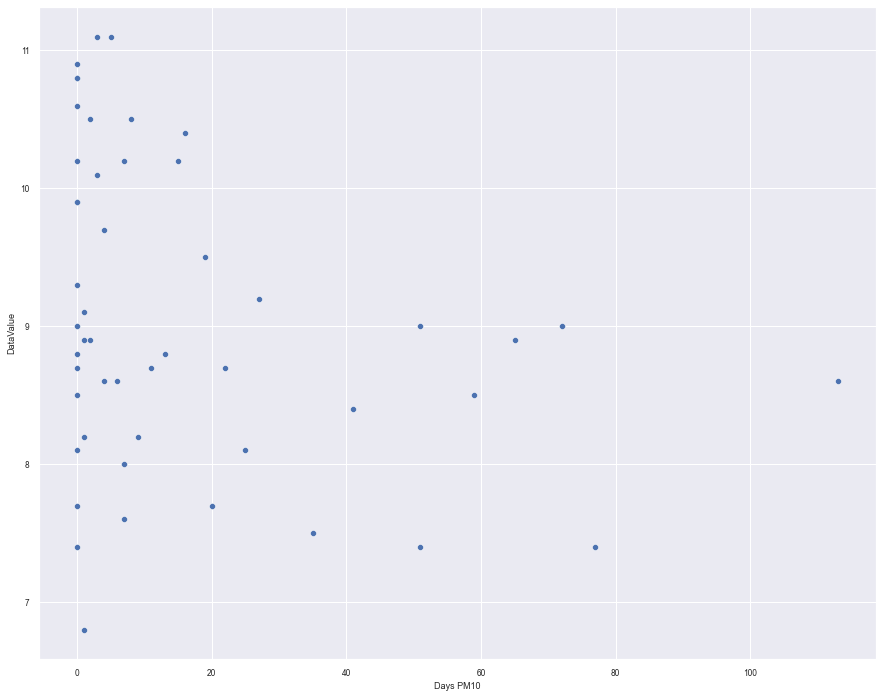

In [42]:
sns.scatterplot(x='Days PM10', y='DataValue', data=merged2012Plotting)

### End of Air Quality and Asthma at the U.S. State level